# Libs

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
import time
from sklearn.metrics import accuracy_score, classification_report

# Prepocessing

In [3]:
df = pd.read_csv("creditcard_2023.csv")
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [7]:
df.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


In [14]:
df = df.drop(columns=["id"])
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [20]:
print('Number of row and columns:')
print(df.shape)
print('\nColumns name:')
print(df.columns)
print('\nData type:')
print(df.info())

Number of row and columns:
(568630, 30)

Columns name:
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

Data type:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 1

In [16]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
df.duplicated().sum()

np.int64(1)

Distribution Counts:
 Class
0    284315
1    284315
Name: count, dtype: int64


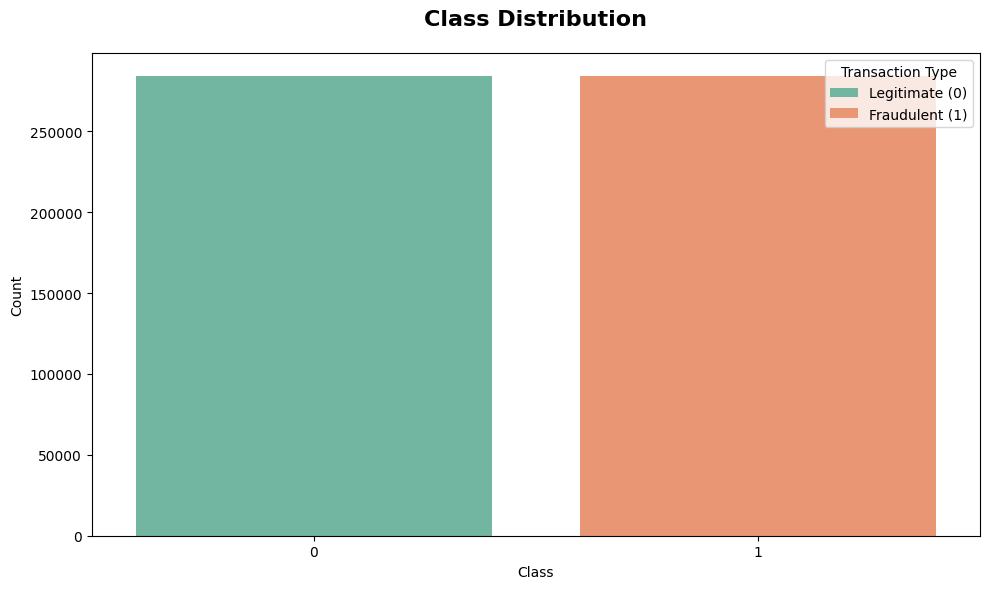

In [27]:
#imbalance check
plt.figure(figsize=(10, 6))

ax = sns.countplot(
    x='Class',
    hue='Class',
    data=df,
    palette='Set2')

plt.title('Class Distribution', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Class')
plt.ylabel('Count')

handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles,
    ['Legitimate (0)', 'Fraudulent (1)'],
    title='Transaction Type')

print("Distribution Counts:\n", df['Class'].value_counts())

plt.tight_layout()
plt.show()

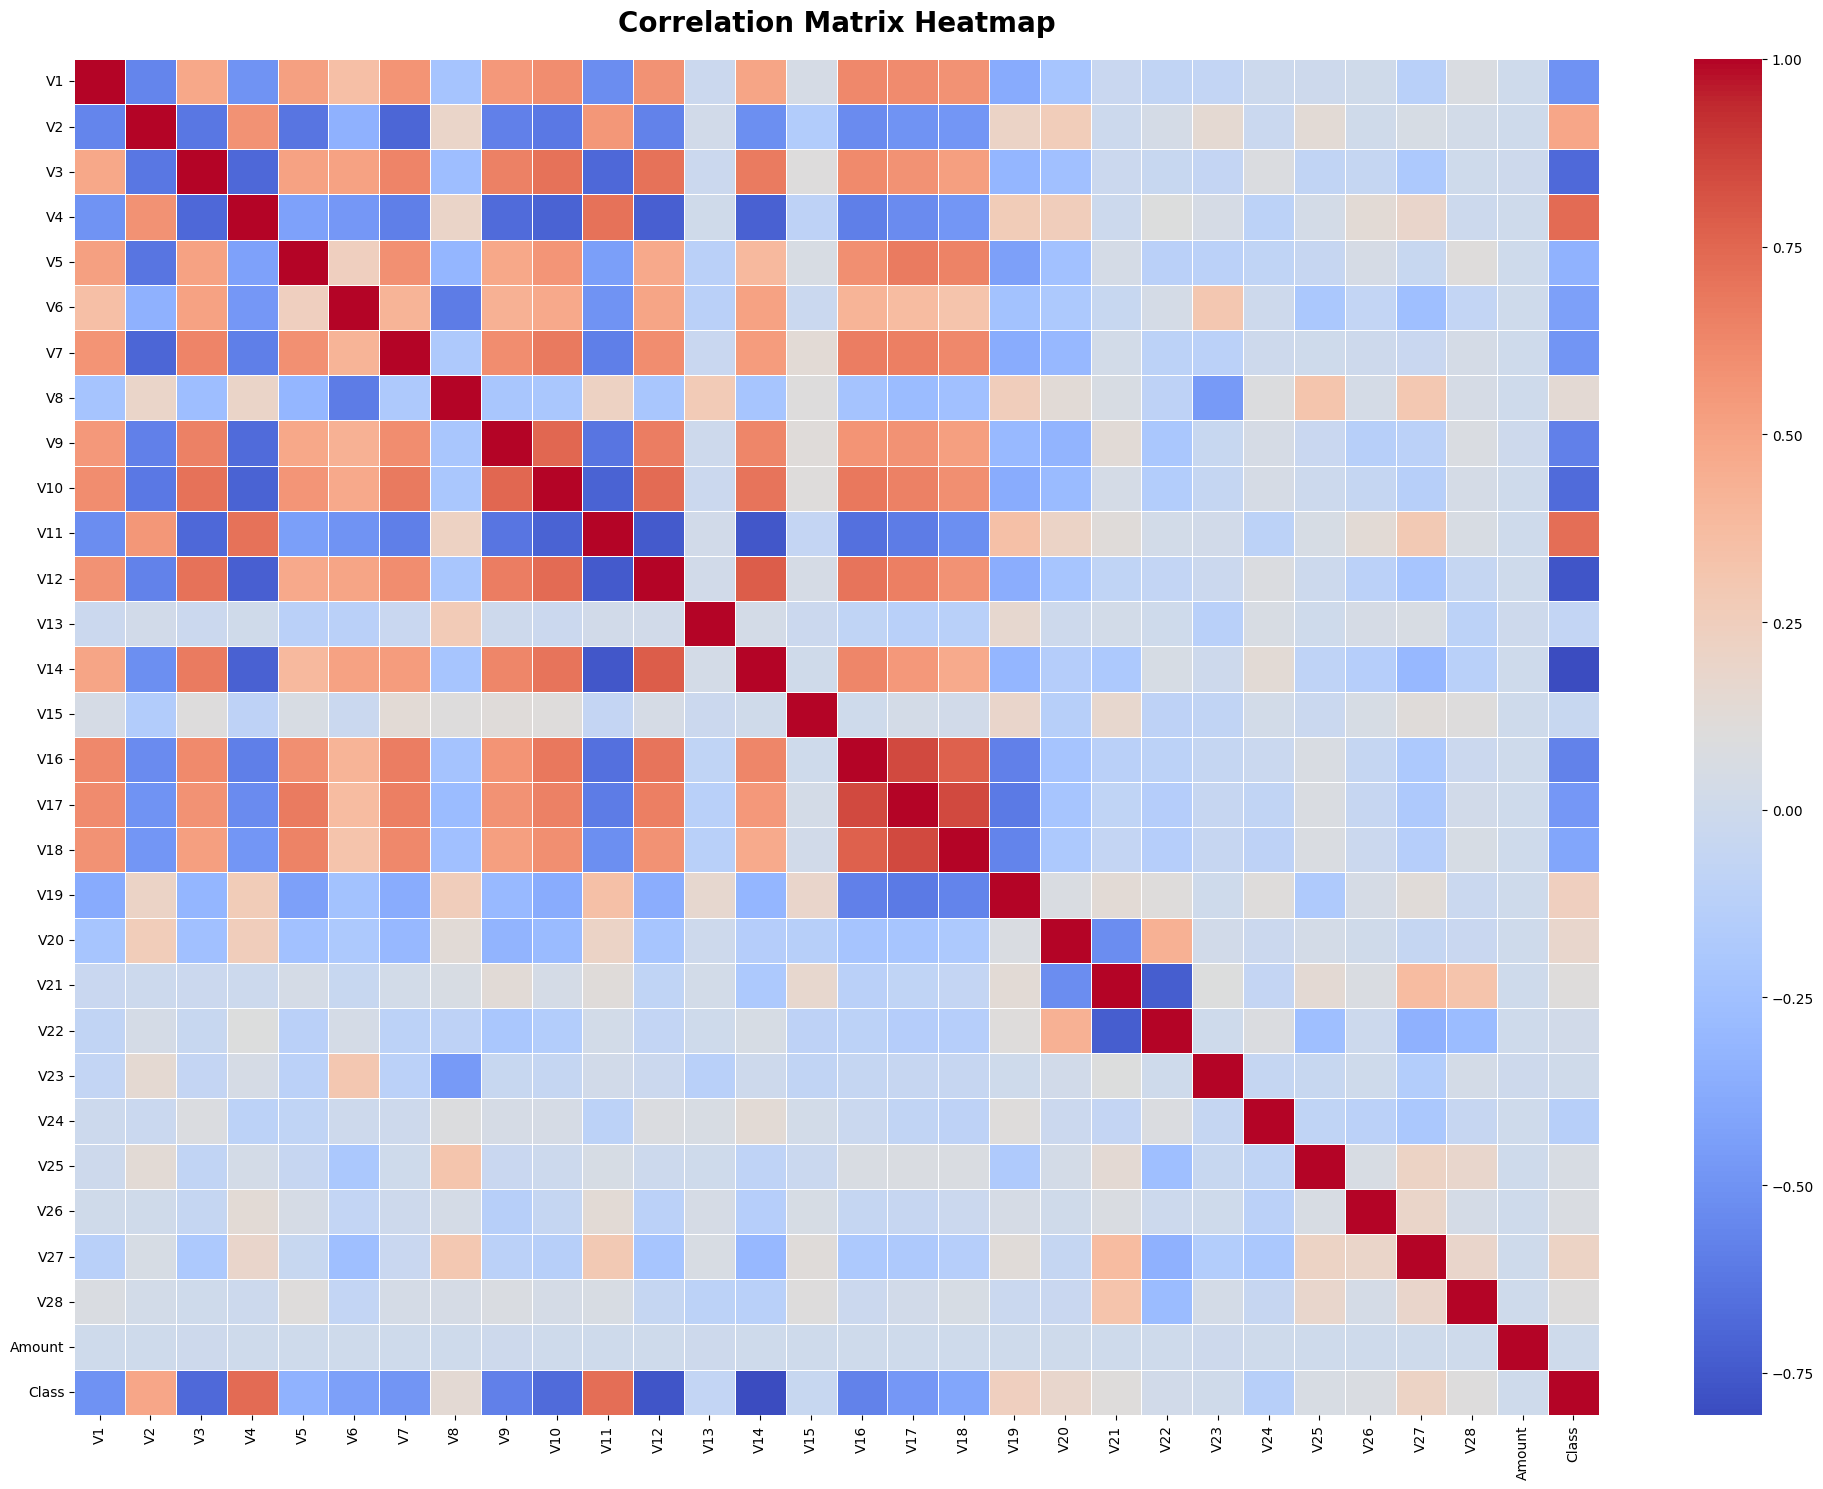

In [30]:
plt.figure(figsize=(20, 15))
corr_matrix = df.corr()
sns.heatmap(
    corr_matrix,
    annot=False,
    cmap='coolwarm',
    linewidths=0.5)

plt.title('Correlation Matrix Heatmap', fontsize=20, pad=20, fontweight='bold')
plt.tight_layout()
plt.show()

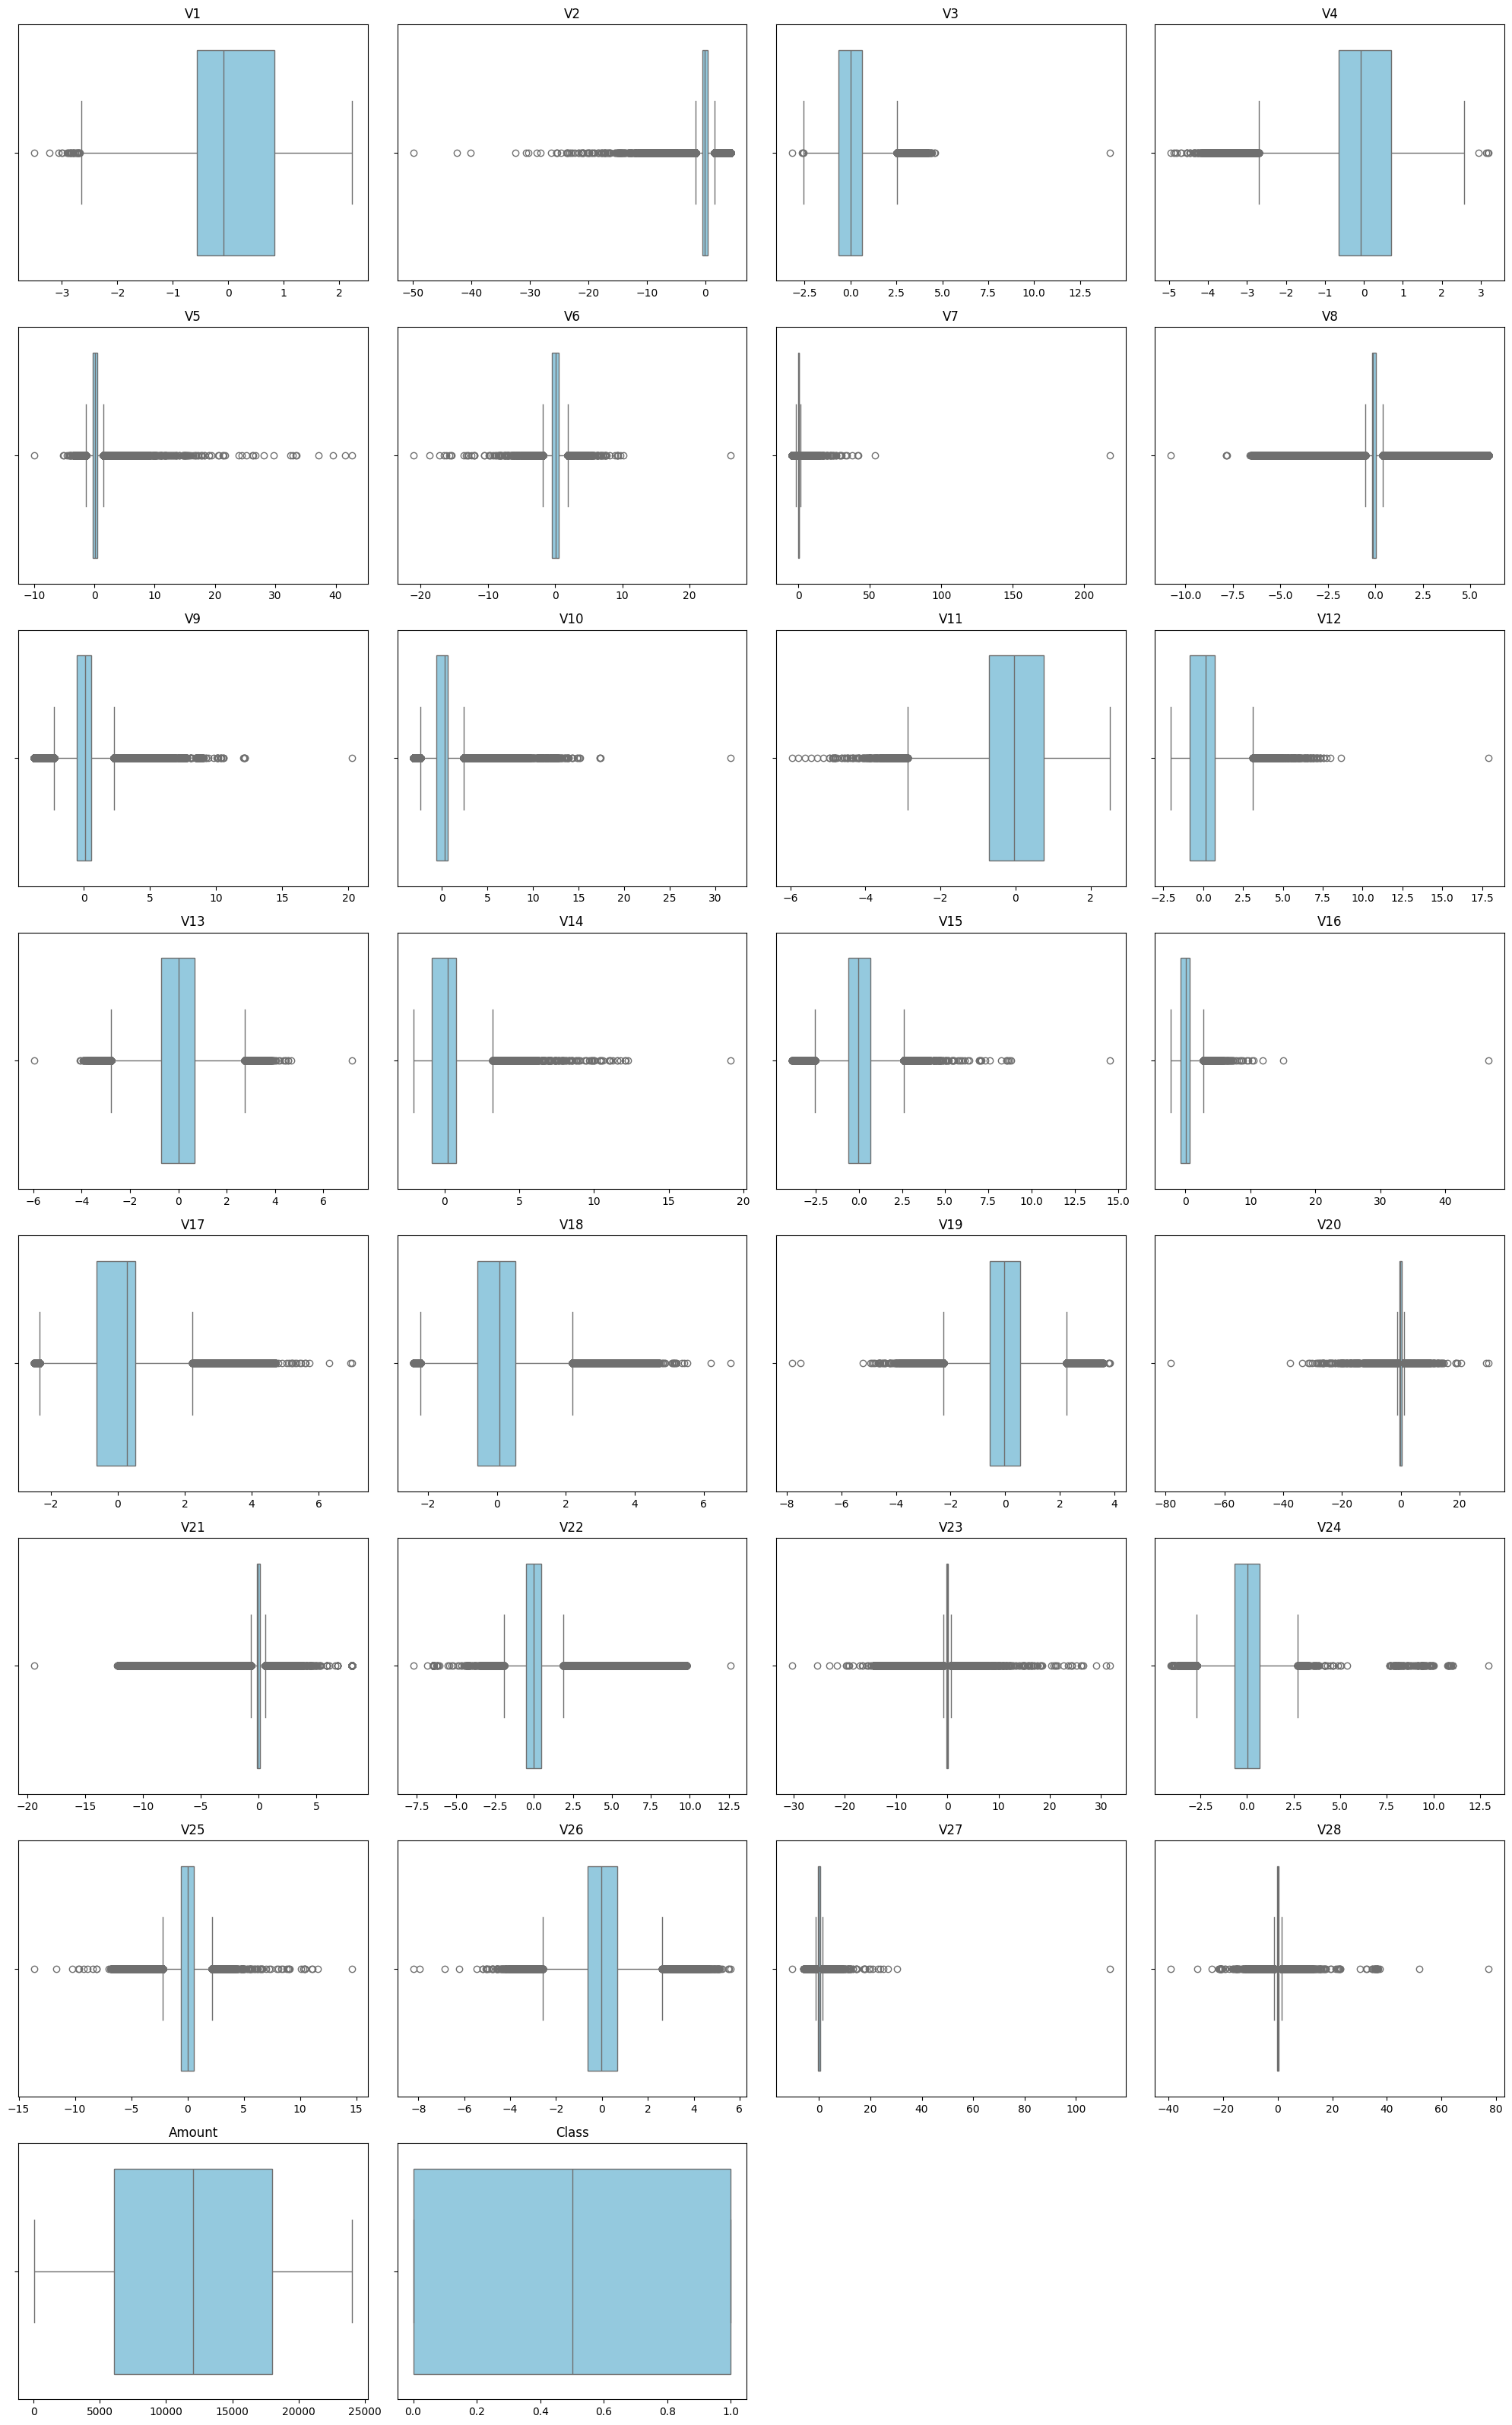

In [ ]:
# Box plots for all features
features = list(df.columns)
n_cols = 4
n_rows = (len(features) + n_cols - 1) // n_cols

fig,axes = plt.subplots(n_rows, n_cols, figsize = (20, n_rows *4))
axes = np.array(axes).flatten()

for i, col in enumerate(features):
  sns.boxplot(data = df, x = col, ax = axes[i], color = 'skyblue')
  axes[i].set_title(col)
  axes[i].set_xlabel('')

for i in range(len(features), len(axes)):
  fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Modeling

In [33]:
X = df.drop(columns=["Class"])
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42, stratify = y)
print(f'Training Shape: {X_train.shape}')
print(f'Testing Shape: {X_test.shape}')

Training Shape: (398041, 29)
Testing Shape: (170589, 29)


In [40]:
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
  print(f'Training {model}')
  start_time = time.time()

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  end_time = time.time()
  print(f'Done in {end_time - start_time:.2f} seconds')

  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred)
  rec = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  print(f'\n {'-'*30}')
  print(f'\nResult for {model_name}: ')
  print(f'Accuracy: {acc}')
  print(f'Precision: {prec}')
  print(f'Recall: {rec} ')
  print(f'F1 Score: {f1}')
  print('-'*30)

  return {f'Model: {model_name}, Accuracy: {acc}, Precision: {prec}, Recall: {rec}, F1 Score: {f1}'}

In [41]:
results_list = []
dt_model = DecisionTreeClassifier(random_state=42, max_depth=6)
results_list.append(evaluate_model(dt_model, X_train, y_train, X_test, y_test, "Decision Tree"))

Training DecisionTreeClassifier(max_depth=6, random_state=42)
Done in 12.95 seconds

 ------------------------------

Result for Decision Tree: 
Accuracy: 0.9639191272590847
Precision: 0.9772412046361849
Recall: 0.9499613102914625 
F1 Score: 0.9634081815857842
------------------------------


In [42]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state= 42, n_jobs=-1, max_depth=10)
results_list.append(evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest"))

Training RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)
Done in 93.02 seconds

 ------------------------------

Result for Random Forest: 
Accuracy: 0.9853097210253885
Precision: 0.9983266318349264
Recall: 0.9722489272398996 
F1 Score: 0.9851152292706106
------------------------------


In [43]:
results_df = pd.DataFrame(results_list)
results_df

,0
0,"Model: Decision Tree, Accuracy: 0.963919127259..."
1,"Model: Random Forest, Accuracy: 0.985309721025..."


# Save and Predict

In [48]:
import joblib
joblib.dump(dt_model, "decision_tree.pkl")
joblib.dump(rf_model, "random_forest.pkl")

['random_forest.pkl']

In [53]:
rf_test = joblib.load("random_forest.pkl")
y_pred_rf = rf_test.predict(X_test)

dt_test = joblib.load("decision_tree.pkl")
y_pred_dt = dt_test.predict(X_test)

In [55]:
rf_test_accuracy = rf_test.score(X_test, y_test)
print("Random Forest Test Accuracy:", rf_test_accuracy)

dt_test_accuracy = dt_test.score(X_test, y_test)
print("Decision Tree Test Accuracy:", dt_test_accuracy)

Random Forest Test Accuracy: 0.9853097210253885
Decision Tree Test Accuracy: 0.9639191272590847
